## Introduction

There are many models for **clustering** out there. In this notebook, you will be using the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. 

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook we practice k-means clustering with 2 examples:

*   k-means on a random generated dataset
*   Using k-means for customer segmentation


## Customer Segmentation with K-Means

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

## Load Data From CSV File

In [1]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre-processing

Address in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.​

In [7]:
df = cust_df.drop('Address', axis=1)

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,10,47,3,23,115,0.653,3.947,0.0,4.0


## Standardizing the data 

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Assessing the number of cluster using WCSS

**K-means** algorithm must be supplied with the number of expected clusters. The optimum number of clusters can be assessed using the "elbow"/WCSS method. Investigate how many clusters better explain the data variance.

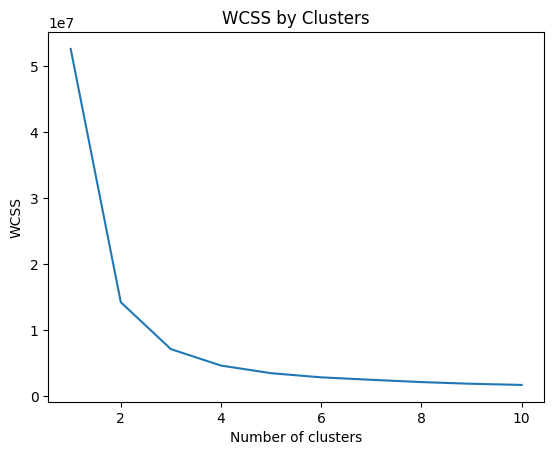

In [15]:
## Your code comes here.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df['Defaulted'].fillna(0,inplace=True)

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(df.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Modeling

Cluster the customer according using the k-means algorithm implementation from the scikit-learn package. Remember, you assessed the `k` that has to be provided to k-means in the previous step.

In [13]:
## Your code comes here.kmeans = KMeans(n_clusters=2)

# Create a model based on 2 
model = KMeans(n_clusters=2, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(df.values)

## Cluster visualization

Now, plot the cluster assignments you got in the previous chunk.

In [ ]:
## Your code comes here.

## Insights

Do you have any insights of how the customers clustered. For example, what kind of categories you could define?